In [ ]:
from gqimax2.instructor import Instructor
import numpy as np
import matplotlib.pyplot as plt

for num_qubits in range(2, 16):
	num_layers = 2
	ins = Instructor(num_qubits)
	for k in range(num_layers):
		for i in range(num_qubits - 1):
			ins.append('cx', [i, i + 1])
		ins.append('cx', [num_qubits - 1, 0])
		for i in range(num_qubits):
			ins.append('rx', i, 1)
			ins.append('ry', i, 2)
			ins.append('rz', i, 3)
	ins.run()

	lenght = []
	for lambdas in ins.lambdass:
		lenght.append(len(lambdas))
	print(f"{num_qubits} qubits, 2 layers: ", np.average(lenght))

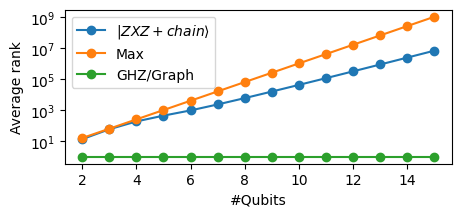

In [ ]:
ranks = [
	13.5, 59.0, 189.0, 447.0, 971.5, 2356.714285714286, 6048.375, 
	15993.666666666666, 43049.7, 117276.81818181818, 322381.25, 
	892619.3076923077, 2486454.6428571427, 6961946.2
]

max_ranks = [4**i for i in range(2, 16)]

fig, axs = plt.subplots(1, 1, figsize=(5, 2))


plt.plot(range(2, 16), ranks, marker = 'o', label = rf'$|ZXZ+chain\rangle$')
plt.plot(range(2, 16), max_ranks, marker = 'o', label = 'Max')
plt.plot(range(2, 16), [1]*14, marker = 'o', label='GHZ/Graph')
plt.yscale('log')
plt.xlabel('#Qubits')
plt.ylabel('Average rank')
plt.legend()
# plt.savefig('rank.pdf', dpi=300, bbox_inches='tight')
plt.show()